In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
df = pd.read_csv("out/data.csv")
df['Start Time'] = pd.to_datetime(df['Start Time'], utc=True)
df.head()

,ID,Start Time,Duration,Duration Milliseconds,Error
0,GET/,2024-02-12 08:45:27+00:00,342.030666ms,342,NaN
1,GET/anything,2024-02-12 08:45:28+00:00,299.415084ms,299,NaN
2,GET/,2024-02-12 08:45:28+00:00,565.532ms,565,NaN
3,GET/anything,2024-02-12 08:45:28+00:00,299.414416ms,299,NaN
4,GET/,2024-02-12 08:45:29+00:00,300.033792ms,300,NaN


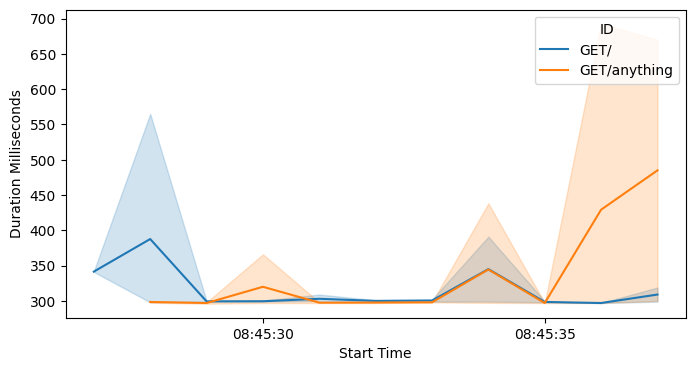

In [22]:
plt.figure(figsize=(8,4))
sns.lineplot(data=df,x='Start Time',y='Duration Milliseconds',hue="ID")
plt.show()

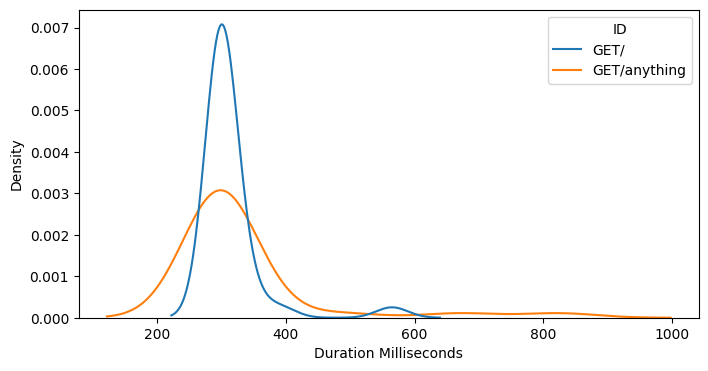

In [25]:
plt.figure(figsize=(8,4))
sns.kdeplot(data=df,x='Duration Milliseconds',hue="ID")
plt.show()